In [1]:
# Required Packages
from sklearn import datasets		# To Get iris dataset
from sklearn import svm    			# To fit the svm classifier
import numpy as np
import matplotlib.pyplot as plt            # To visuvalizing the data

In [2]:
# import iris data to model Svm classifier
iris = datasets.load_iris()

In [3]:
X = iris.data[:, 2:]  # we only take the last two features.
y = iris.target


<h2>SVC with linear kernel</h2>

In [4]:
C = 10.0  # SVM regularization parameter

svc = svm.SVC(kernel='linear', C=C).fit(X, y)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

In [5]:
lin_svc.score(X,y)

0.96

<h2>SVC with RBF kernel</h2>

In [6]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)

<h2>SVC with polynomial (degree 3) kernel</h2>

In [7]:
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

In [8]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	            np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel',
	  'LinearSVC (linear kernel)',
	  'SVC with RBF kernel',
	  'SVC with polynomial (degree 3) kernel']

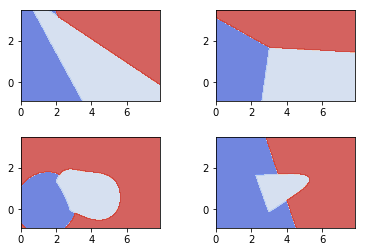

In [9]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)


plt.show()